In [1]:
from collections import defaultdict
import math

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, entropy

import sim_lib.util as util
import sim_lib.graph_networkx as gnx
import sim_lib.attr_lib.util as alu
from sim_lib.attr_lib.formation import *
import sim_lib.attr_lib.vis as vis

In [2]:
_N = 16
iter_count = 10

params = {
    'context_count' : 2, # Needed for simple utility
    'k' : 1, # Needed for simple attribute utility
    'edge_selection' : alu.seq_projection_edge_edit,
    'attr_copy' : alu.freq_attr_copy,
    'seed_type' : 'grid', # Type of seed network
    'max_clique_size' : 5,
    'revelation_proposals' : alu.resistance_distance_revelation,
    'util_agg' : lambda a, s, c: a + s, # How to aggregate utility values
    'vtx_types' :
        {
            'type1' : { 'likelihood' : 0.5,
                      'struct_util' : None,
                      'init_attrs' : alu.init_cont_heterophily, # context 1
                      'edge_attr_util' : None,
                      'total_attr_util' : None,
                      'color' : 'blue' },
            'type0' : { 'likelihood' : 0.5,
                      'struct_util' : None,
                      'init_attrs' : alu.init_cont_homophily, # context 0
                      'edge_attr_util' : None,
                      'total_attr_util' : None,
                      'color' : 'red' }
        }
}

type1_count = math.floor(_N * params['vtx_types']['type1']['likelihood'])
vtx_types_list = ['type1'] * type1_count + ['type0'] * (_N - type1_count)
np.random.shuffle(vtx_types_list)
params['type_assignment'] = { i : vtx_types_list[i] for i in range(_N) }

assert sum([ t['likelihood'] for t in params['vtx_types'].values() ]) == 1.0

In [3]:
def struct_utils(G):
    return [ u.data['struct_util'](u, G) for u in G.vertices ]

def attribute_utils(G):
    return [ u.data['total_attr_util'](u, G) for u in G.vertices ]

def degrees(G):
    return [ u.degree for u in G.vertices ]

def costs(G):
    return [ alu.calc_cost(u, G) for u in G.vertices ]

In [4]:
def plot_distributions(ks_sims, kl_sims, plot_title):
    
    x_vals = list(range(iter_count))
    plt.plot(x_vals, ks_sims, label='KS score')
    plt.plot(x_vals, kl_sims, label='KL score')
    plt.xlabel('Iteration')
    plt.ylabel('Score')
    plt.title(plot_title)
    plt.legend(loc='upper right')
    plt.show()
    

KS [1.0, 1.0, 1.0, 0.875, 0.125, 0.375, 0.1875, 0.125, 0.3125, 0.5]
KL [0.01166419528810753, 0.008274766497498103, 0.007319332286769058, 0.0058854054453683045, 0.005944070197538273, 0.005947101823579937, 0.0077768352258445715, 0.004983817783698408, 0.002375802962913235, 0.004484748933950629]


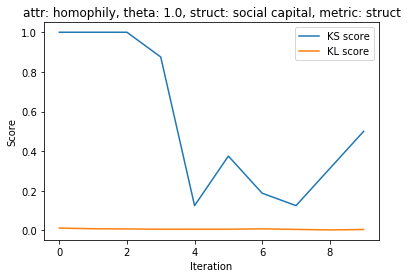

KS [1.0, 0.625, 0.5, 0.5625, 0.1875, 0.25, 0.1875, 0.25, 0.1875, 0.25]
KL [0.06219421433174286, 0.007089961957689926, 0.0040540251583997735, 0.0006976884879494882, 0.0012431677799724606, 0.0008210554706017312, 0.0016981880060472467, 0.0011616175553684494, 0.00030710975043732786, 0.0006080889689767191]


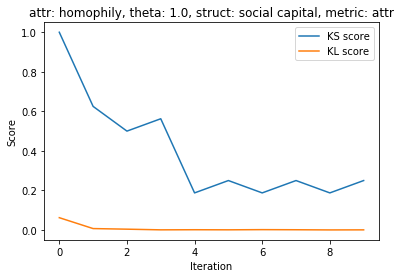

KS [1.0, 0.9375, 0.8125, 0.3125, 0.125, 0.25, 0.25, 0.1875, 0.375, 0.375]
KL [0.041004917463796524, 0.020986660700163424, 0.01267567152155776, 0.022229271143212, 0.015321920212108446, 0.018342865444508, 0.012809443856482628, 0.014313576385350218, 0.009885492781726459, 0.01006012213051885]


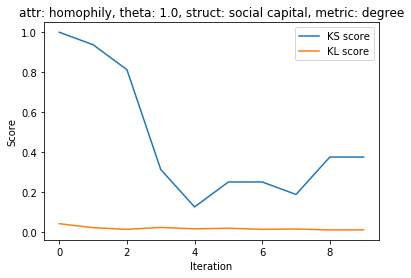

KS [1.0, 0.9375, 0.8125, 0.375, 0.125, 0.25, 0.3125, 0.3125, 0.4375, 0.5]
KL [0.04797080468876708, 0.024419158023937695, 0.012986202261469197, 0.027568661341466072, 0.017136142481519435, 0.02084176617209629, 0.01413861632545002, 0.016271913392064408, 0.011058835586539034, 0.012041998567517236]


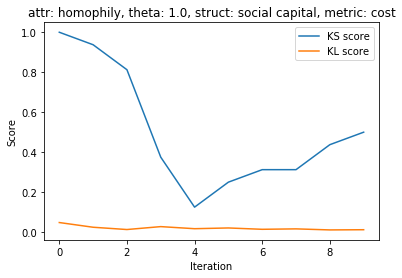

KS [1.0, 0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KL [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


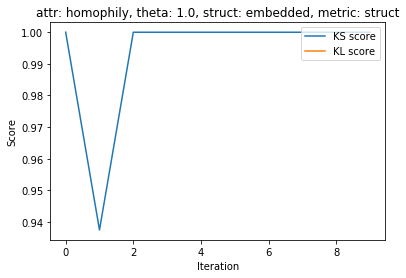

KS [0.6875, 0.5625, 0.375, 0.25, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
KL [0.10605969632097453, 0.0470994581740784, 0.03404638008847854, 0.029835661646010717, 0.027031092817491414, 0.025943407390330665, 0.024880212919221052, 0.024880212919221052, 0.024880212919221052, 0.024880212919221052]


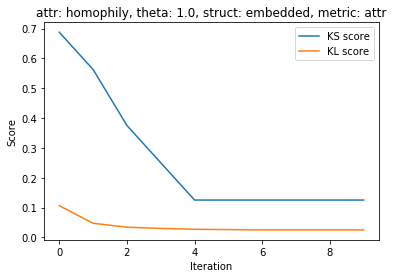

KS [1.0, 1.0, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [0.16434395662406243, 0.06948079525093714, 0.05125275222306856, 0.044632966933432425, 0.04623114434168352, 0.04157958126800895, 0.03902682561550644, 0.03902682561550644, 0.03902682561550644, 0.03902682561550644]


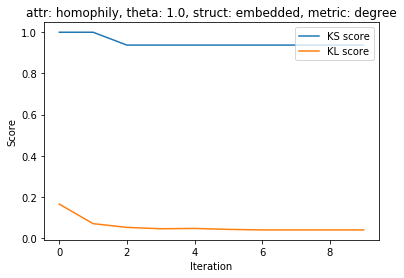

KS [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KL [0.17056538831704948, 0.07516248502188057, 0.05695346051032633, 0.05106933468651097, 0.05356499793766413, 0.04839420637736508, 0.04543321254404291, 0.04543321254404291, 0.04543321254404291, 0.04543321254404291]


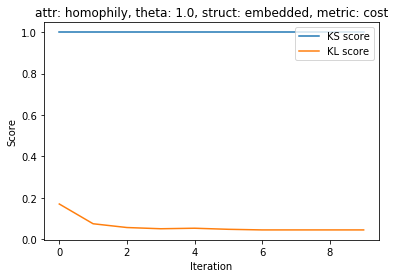

KS [1.0, 1.0, 1.0, 0.9375, 0.5625, 0.5, 0.5625, 0.5, 0.5, 0.375]
KL [0.02934629048980097, 0.02689234326542867, 0.01678665383098352, 0.013112215098330725, 0.011238455634446712, 0.01194540205785803, 0.009903536690884843, 0.014856242368765636, 0.011520430307202813, 0.009833824581851416]


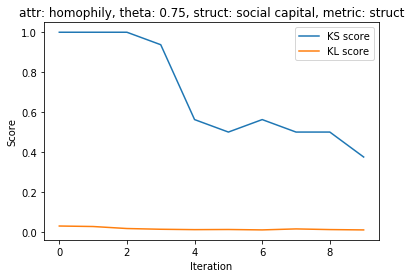

KS [0.875, 0.8125, 0.3125, 0.125, 0.25, 0.375, 0.1875, 0.125, 0.3125, 0.25]
KL [0.042472679168224794, 0.012293706921777356, 0.0034647346531100874, 0.0007497217860136015, 0.001995897884313067, 0.0016183741736454007, 0.0006964498520812736, 0.0003029538758350953, 0.0002781965909751582, 0.0003504795777495035]


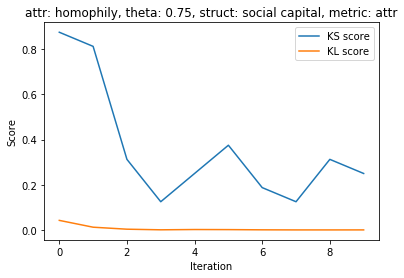

KS [0.9375, 0.875, 0.6875, 0.5, 0.375, 0.375, 0.4375, 0.3125, 0.4375, 0.375]
KL [0.07273503908127874, 0.06563693288386391, 0.04503370369341507, 0.030172935624572496, 0.02471777513244244, 0.02377916212996348, 0.022968383300780697, 0.031996466634915795, 0.018443230276107152, 0.01463775284279391]


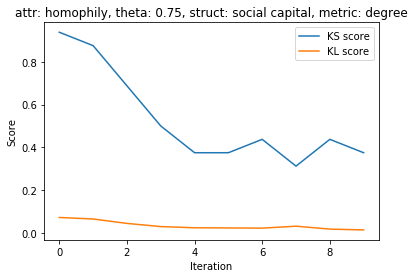

KS [0.9375, 0.875, 0.6875, 0.5, 0.375, 0.375, 0.4375, 0.375, 0.4375, 0.4375]
KL [0.07720926029230407, 0.0674300334756813, 0.04665076372891591, 0.03142942896345901, 0.026198859337773175, 0.0240496436173206, 0.022912762554342245, 0.03392767354632219, 0.018287433531818116, 0.014490822944431526]


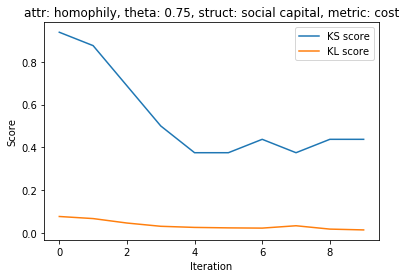

KS [0.8125, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
KL [nan, inf, inf, inf, inf, inf, inf, inf, inf, inf]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2671: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)


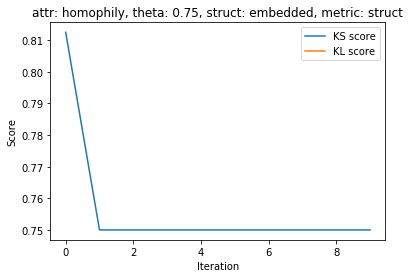

KS [0.9375, 0.875, 0.75, 0.75, 0.625, 0.5, 0.5, 0.4375, 0.375, 0.375]
KL [0.06605154608173983, 0.02180223212785805, 0.015424892442723895, 0.013305473612071723, 0.013667059110043355, 0.011632872015203289, 0.011632872015203289, 0.01172952116846639, 0.007207130536207902, 0.004936392634034758]


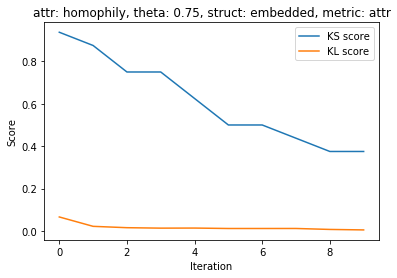

KS [0.875, 0.8125, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
KL [0.1543767041561994, 0.046677094008610115, 0.03829245109340728, 0.03334832174247017, 0.03731498948623198, 0.03725887989292094, 0.03725887989292094, 0.035046619320826526, 0.027383722099843764, 0.026572496241182835]


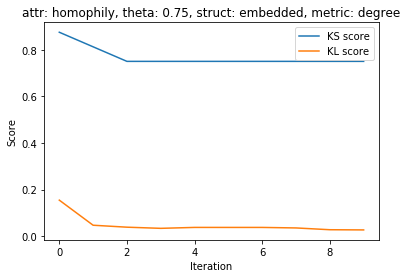

KS [0.875, 0.8125, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
KL [0.16013776056721718, 0.05223138857583648, 0.043785887654879015, 0.03942627212084641, 0.043464789260996235, 0.04344151099617066, 0.04344151099617066, 0.04103275399912176, 0.03327908068968598, 0.03251764220416624]


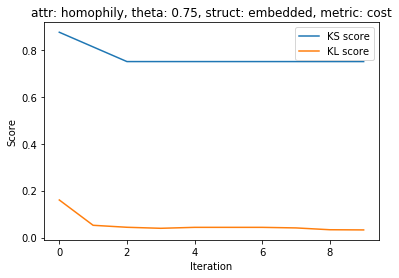

KS [1.0, 1.0, 1.0, 0.9375, 0.75, 0.8125, 0.3125, 0.375, 0.4375, 0.125]
KL [0.014979338703802225, 0.012570921677361013, 0.002130841831214203, 0.0011645578558638439, 0.0005977408576903365, 0.0006118696366331164, 0.0007583739689722454, 0.0003652327059548901, 0.00015982064041339308, 0.00020208879240458553]


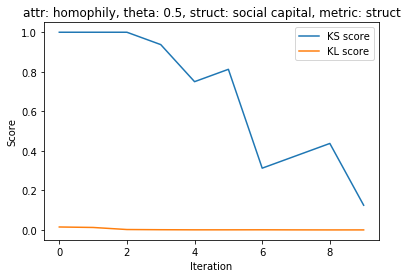

KS [1.0, 0.875, 0.625, 0.1875, 0.0625, 0.125, 0.125, 0.3125, 0.125, 0.0625]
KL [0.026247367310918666, 0.004811835856808017, 0.007615795315875194, 0.0017141749597456447, 0.0017598495870873943, 0.0004955753720997423, 0.0009219399712299373, 0.0004281768816413287, 0.00020296673628250475, 9.970990354948059e-05]


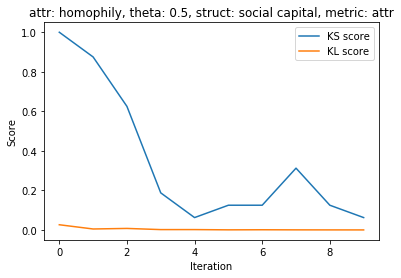

KS [1.0, 0.9375, 0.75, 0.5, 0.4375, 0.375, 0.1875, 0.25, 0.1875, 0.25]
KL [0.0353849591781408, 0.021928400048740505, 0.011855155881089664, 0.005176321900898862, 0.0033174268657409165, 0.002964836302085442, 0.0033920560598257464, 0.0013833494939425183, 0.002006103852880005, 0.000972928231624376]


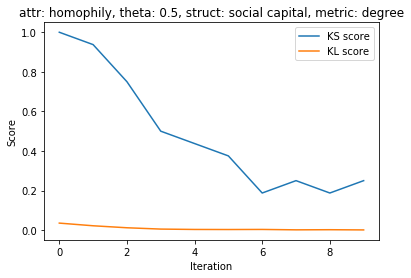

KS [1.0, 0.9375, 0.6875, 0.4375, 0.4375, 0.4375, 0.1875, 0.25, 0.25, 0.375]
KL [0.03670570207022958, 0.021726235506399662, 0.012753310750235045, 0.0055081958154629945, 0.003577058557535132, 0.00281556561767218, 0.0033461907611750837, 0.001441870211756614, 0.002131300543827966, 0.0010082402727681194]


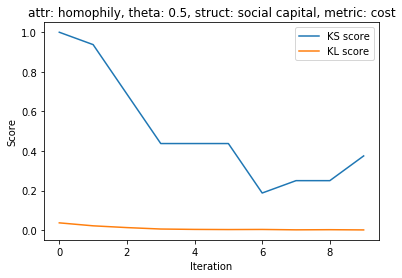

KS [1.0, 0.875, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [nan, inf, 0.18019437423412427, 0.18019437423412427, 0.18019437423412427, 0.18019437423412427, 0.18019437423412427, 0.18019437423412427, 0.18019437423412427, 0.18019437423412427]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2671: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)


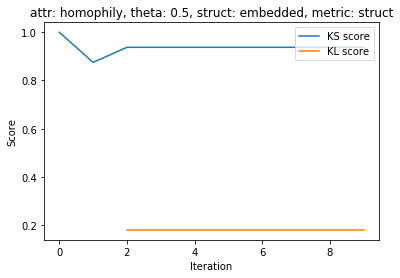

KS [0.875, 0.875, 0.75, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875]
KL [0.07785499777156009, 0.07196009357690884, 0.15137109609918675, 0.14638221860384418, 0.14942995525639527, 0.14942995525639527, 0.14942995525639527, 0.14942995525639527, 0.14021407922224607, 0.14021407922224607]


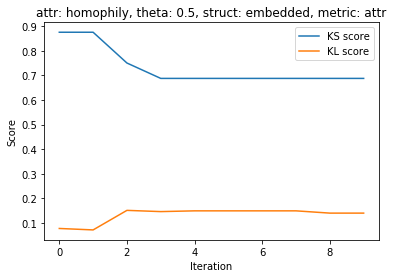

KS [1.0, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [0.11180895534761297, 0.11094425480880034, 0.11692562783553329, 0.11181299426380215, 0.11001832997294395, 0.11001832997294395, 0.11001832997294395, 0.11001832997294395, 0.10603806065807898, 0.10603806065807898]


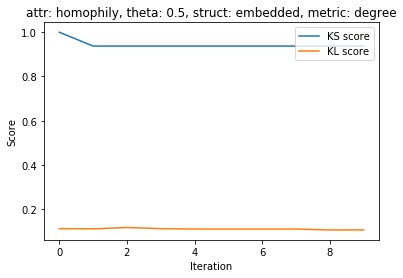

KS [1.0, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [0.11871988385716367, 0.12303271830100333, 0.12658829535906096, 0.12084349535953927, 0.11891931426258359, 0.11891931426258359, 0.11891931426258359, 0.11891931426258359, 0.11607511882186444, 0.11607511882186444]


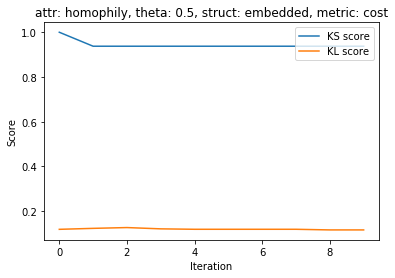

KS [1.0, 1.0, 1.0, 1.0, 1.0, 0.8125, 0.8125, 0.625, 0.3125, 0.5625]
KL [0.007111323746232669, 0.004468133691327296, 0.0041604815538546355, 0.001352935228601544, 0.0006959183757373321, 0.0005221668648704683, 0.0005242005654402364, 0.0001568701817138262, 0.00010249809519242807, 0.00015023002477191618]


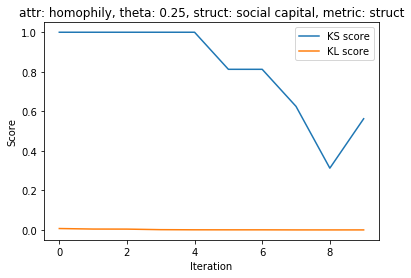

KS [0.9375, 0.625, 0.75, 0.3125, 0.1875, 0.125, 0.0, 0.0625, 0.0, 0.0]
KL [0.022815335463318077, 0.005827323187567176, 0.002815211768175792, 0.0015988049930828912, 0.0017062769162016593, 0.0005912822503683192, 0.0, 0.00030581024051088866, 0.0, 0.0]


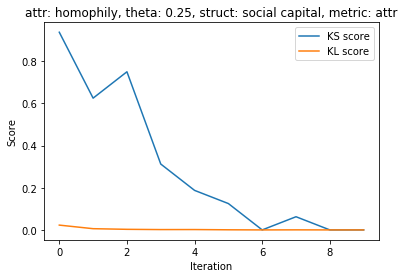

KS [1.0, 1.0, 0.9375, 0.6875, 0.5, 0.375, 0.375, 0.25, 0.125, 0.1875]
KL [0.00977413033785349, 0.006723730320116149, 0.009077789875053824, 0.008931735105072228, 0.0027682750413502624, 0.002847696267449795, 0.001889429289050313, 0.0017139052920097722, 0.0015668548751516242, 0.0021688468249816788]


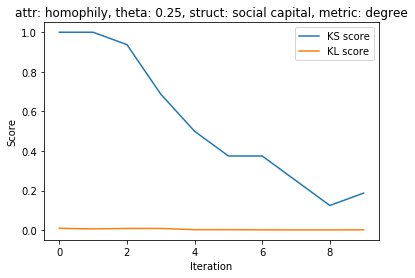

KS [1.0, 1.0, 0.9375, 0.6875, 0.5, 0.375, 0.375, 0.375, 0.1875, 0.1875]
KL [0.010120664972089775, 0.006539912128363464, 0.009950089057384474, 0.009355910068468531, 0.0028904613536566894, 0.0030628201298929687, 0.0018090423057255324, 0.0016748367388994241, 0.0014370194979326997, 0.002124438664470929]


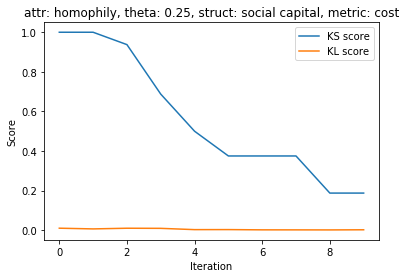

KS [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KL [nan, inf, inf, inf, inf, inf, inf, inf, inf, inf]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2671: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)


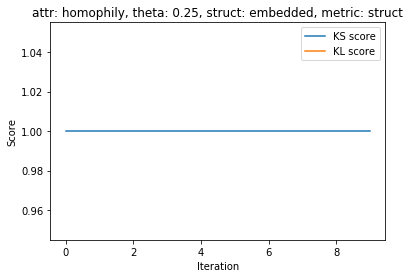

KS [0.9375, 0.8125, 0.8125, 0.625, 0.625, 0.625, 0.625, 0.625, 0.5, 0.5]
KL [0.06562826934520762, 0.11938867252098895, 0.10871191175276057, 0.11744512961678619, 0.11744512961678619, 0.1147245580232446, 0.1147245580232446, 0.1147245580232446, 0.11357312616156275, 0.11357312616156275]


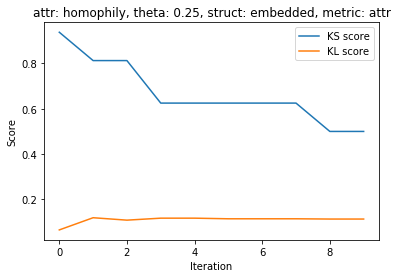

KS [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KL [0.08756225414418503, 0.056452626471249746, 0.057026103719699545, 0.0616472189377799, 0.0616472189377799, 0.05868813113429072, 0.05868813113429072, 0.05868813113429072, 0.06042422046834403, 0.06042422046834403]


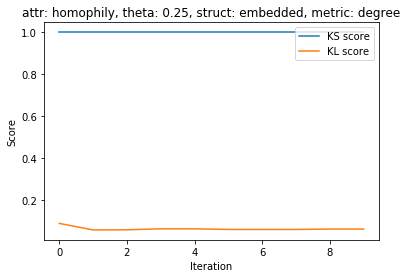

KS [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KL [0.0978096582231491, 0.07600389453001216, 0.0778105800879617, 0.08400383304086655, 0.08400383304086655, 0.08074970701860554, 0.08074970701860554, 0.08074970701860554, 0.08261867319131769, 0.08261867319131769]


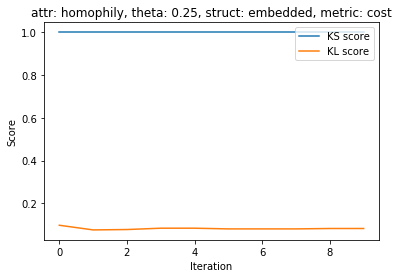

KS [1.0, 1.0, 1.0, 0.9375, 0.625, 0.5625, 0.5625, 0.5, 0.5625, 0.25]
KL [0.03116229601592793, 0.018531342495028982, 0.007768296727083051, 0.004537533170079818, 0.0035355847659341508, 0.0010800326976448766, 0.0007707919567169512, 0.000656271297401435, 0.0002914866902687227, 0.00029087248944942]


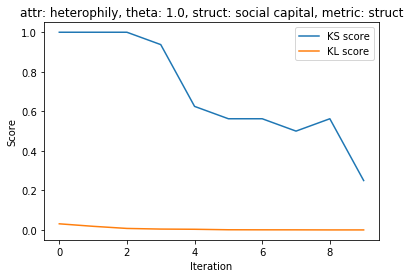

KS [0.875, 0.4375, 0.3125, 0.0625, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0]
KL [0.03458498642841209, 0.0075416108531052226, 0.0011204535140473433, 0.00031541921501877226, 0.0002168400163097663, 0.0, 0.0, 0.0, 0.0, 0.0]


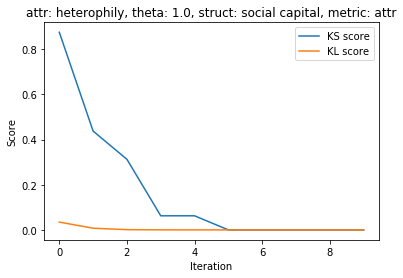

KS [1.0, 1.0, 1.0, 0.875, 0.5, 0.5, 0.4375, 0.4375, 0.5, 0.25]
KL [0.08131947379937837, 0.0415193158526237, 0.02102813133618111, 0.015018833079931626, 0.011678580631335221, 0.004888878232362193, 0.0033926925151380833, 0.003335391620457087, 0.0012693151723896863, 0.0013921749459711585]


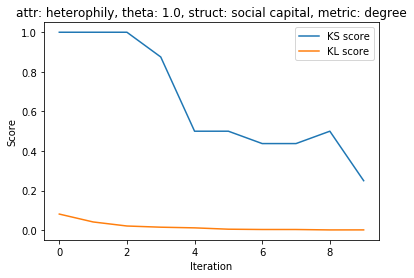

KS [1.0, 1.0, 1.0, 0.875, 0.5, 0.5, 0.4375, 0.4375, 0.5, 0.25]
KL [0.08125276381868443, 0.0415193158526235, 0.021028131336181158, 0.015018833079931397, 0.01167858063133528, 0.004888878232362073, 0.003392692515137956, 0.0033353916204570252, 0.001269315172389665, 0.0013921749459710787]


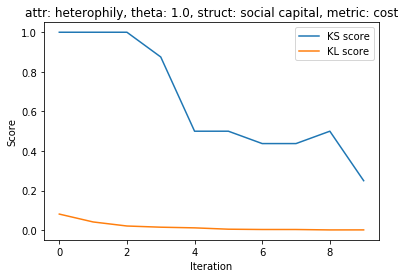

KS [0.75, 0.8125, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
KL [nan, inf, inf, inf, inf, inf, inf, inf, inf, inf]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2671: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)


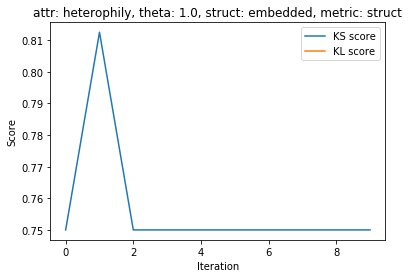

KS [0.625, 0.1875, 0.6875, 0.75, 0.75, 0.8125, 0.625, 0.75, 0.75, 0.75]
KL [0.18890795044776842, 0.21345455156078857, 0.09900540968379473, 0.034830073296007555, 0.016792965680217903, 0.00996258628860082, 0.01489678239951539, 0.011229729719095981, 0.007946470315998991, 0.008115451322720638]


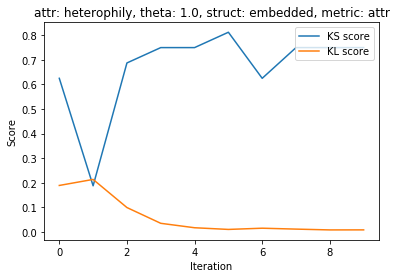

KS [0.875, 0.8125, 0.75, 0.75, 0.75, 0.75, 0.8125, 0.8125, 0.8125, 0.8125]
KL [0.2306525938244839, 0.23453656479183946, 0.18883323115249417, 0.1499210183026727, 0.11236764498209187, 0.07902328128413447, 0.06931026826114348, 0.06640864383423718, 0.07193182455457503, 0.06790279973890091]


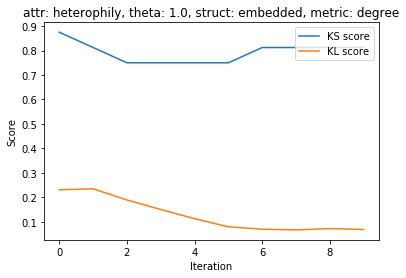

KS [0.875, 0.8125, 0.75, 0.75, 0.75, 0.8125, 0.8125, 0.8125, 0.8125, 0.8125]
KL [0.23990613465851424, 0.24590360729570238, 0.19828756269385545, 0.1630802953480361, 0.1274541316163819, 0.09279392761680905, 0.08336850574016774, 0.08033620096706043, 0.08616420079903145, 0.08183625771589591]


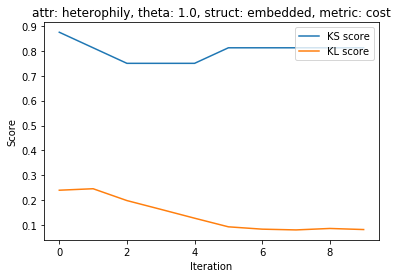

KS [1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 0.5625, 0.4375, 0.5625, 0.25]
KL [0.03314580313559, 0.017419674066161454, 0.0106062594707447, 0.0046191633560643775, 0.0018726062429592822, 0.0010836148158417309, 0.0006583814994830818, 0.0005472313347603106, 0.00031656998895759924, 0.0004586124838380863]


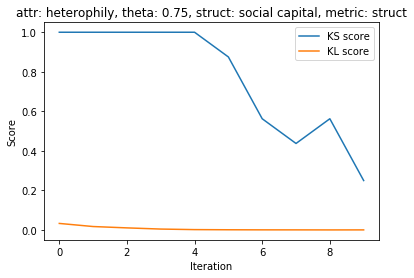

KS [0.9375, 0.75, 0.5625, 0.3125, 0.0625, 0.25, 0.125, 0.1875, 0.125, 0.0625]
KL [0.03954811568530635, 0.0029731387631023974, 0.003124445975748383, 0.0010285282244280997, 0.000431478109672717, 0.0009005216991492702, 0.00044674282075627715, 8.579480721961367e-05, 0.00010399996774566444, 3.3011713161748514e-05]


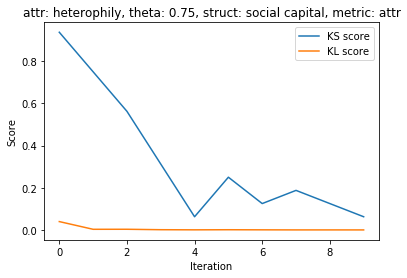

KS [1.0, 0.9375, 0.9375, 0.9375, 0.8125, 0.6875, 0.3125, 0.1875, 0.1875, 0.3125]
KL [0.06732101744973859, 0.03915178559705164, 0.021979948373088226, 0.00728587894455205, 0.009048566515123469, 0.004230440332902679, 0.002501430908866876, 0.0017985617373655382, 0.0014856385686708561, 0.0016129560090800705]


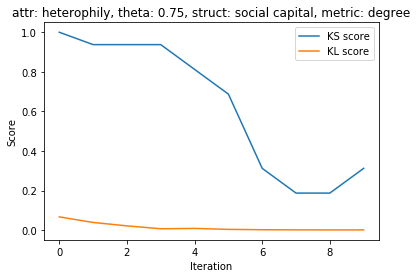

KS [1.0, 1.0, 0.875, 0.9375, 0.875, 0.6875, 0.3125, 0.1875, 0.1875, 0.5]
KL [0.07075174188443936, 0.03921048863390833, 0.024538765629902533, 0.007341779902670525, 0.009511453667584093, 0.004465629730928388, 0.0024917873766857673, 0.0017710775854008045, 0.0014673950573604704, 0.001602629095719896]


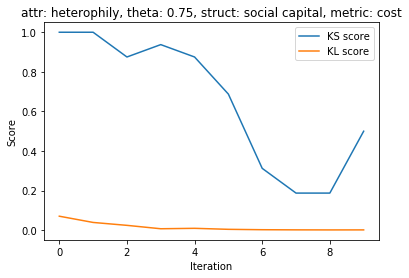

KS [1.0, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875]
KL [nan, 0.2900310746310802, 0.2900310746310802, 0.2900310746310802, 0.2900310746310802, 0.2900310746310802, 0.2900310746310802, 0.2900310746310802, 0.2900310746310802, 0.2900310746310802]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2671: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)


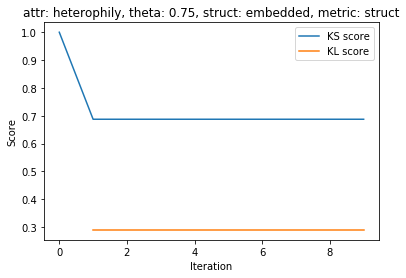

KS [0.5625, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875]
KL [0.04924146355978796, 0.029614404982768967, 0.03019150179474285, 0.027443879022089862, 0.02321249163925707, 0.017944593417819885, 0.017944593417819885, 0.014320235506729425, 0.014320235506729425, 0.01470036227977893]


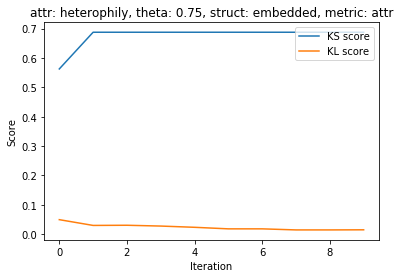

KS [0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [0.06575227581954285, 0.08595822825381075, 0.0809797596244371, 0.07970665337281943, 0.06779899812654132, 0.06559404589011542, 0.06559404589011542, 0.06870661903944929, 0.06870661903944929, 0.06634013084848049]


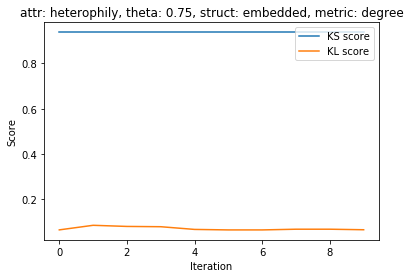

KS [0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [0.07167264575234689, 0.0995279936548047, 0.09392396795345585, 0.09272089384408984, 0.08048033411345802, 0.07902311980309623, 0.07902311980309623, 0.0824145653380237, 0.0824145653380237, 0.07952653349268451]


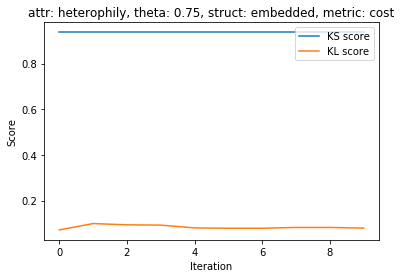

KS [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9375, 0.75, 0.6875, 0.625]
KL [0.01574124888308285, 0.0056689315104275235, 0.006580239091130511, 0.0022509829079855326, 0.0014389154425070196, 0.0006035481486537323, 0.00012230782455487131, 0.00014764185583463429, 0.00010902588064239625, 7.015592860351512e-05]


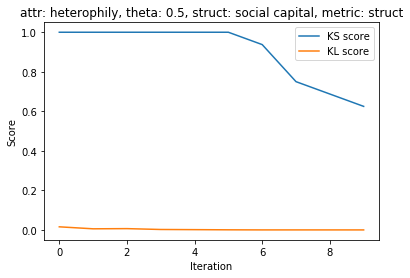

KS [0.9375, 0.5625, 0.5625, 0.625, 0.3125, 0.3125, 0.3125, 0.0, 0.125, 0.0625]
KL [0.01737679431605197, 0.010130312743434344, 0.004443401794852783, 0.0010034575963304582, 0.0019318083741440614, 0.0006280537283363508, 0.0005353486052328046, 0.000288673102455856, 0.00025585926535237353, 0.0004075951920860725]


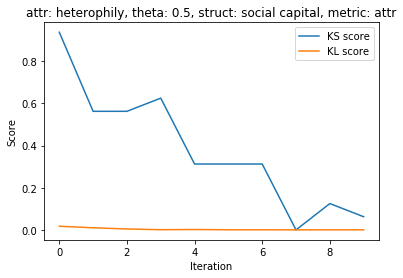

KS [1.0, 1.0, 0.75, 0.875, 0.6875, 0.625, 0.625, 0.125, 0.0625, 0.3125]
KL [0.02971903653328837, 0.01330120036173384, 0.01630415995996144, 0.006802855667121605, 0.006483924667171368, 0.0030120800227069556, 0.003006844523235762, 0.0018483085798701986, 0.002225794930973409, 0.0018453139897541674]


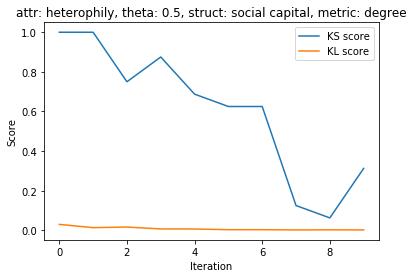

KS [1.0, 1.0, 0.6875, 0.875, 0.625, 0.625, 0.625, 0.1875, 0.125, 0.3125]
KL [0.03168863375691698, 0.013704323828186777, 0.018569718100843156, 0.007846303877521148, 0.007095270041593809, 0.003038997625531068, 0.003063254726210469, 0.0018955186519764005, 0.0023915367986600345, 0.001823838514470379]


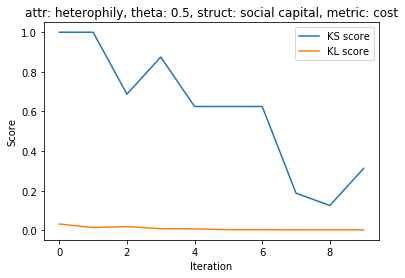

KS [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KL [nan, inf, inf, inf, inf, inf, inf, inf, inf, inf]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2671: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)


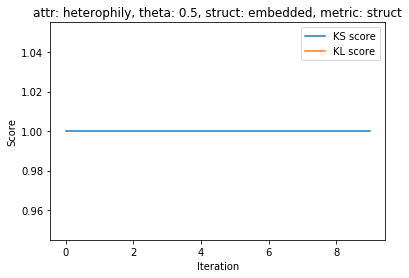

KS [1.0, 1.0, 0.875, 0.8125, 0.75, 0.625, 0.5625, 0.5625, 0.5625, 0.5625]
KL [0.021995957641991276, 0.01285757808351936, 0.010134327548667648, 0.00906668285145203, 0.008622034328735841, 0.007915695070647138, 0.007762545245845044, 0.007762545245845044, 0.007762545245845044, 0.007762545245845044]


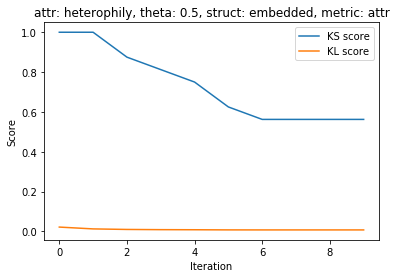

KS [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KL [0.08750410748930876, 0.060746884563129544, 0.05177772919066493, 0.04878207825250712, 0.05569217302015003, 0.054224678826841635, 0.04789560669540553, 0.04789560669540553, 0.04789560669540553, 0.04789560669540553]


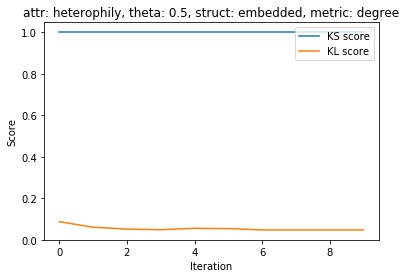

KS [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KL [0.0999517549808974, 0.07805707918588618, 0.06748380001898349, 0.06406748459833787, 0.07202569912948133, 0.07088261897429299, 0.0633230480825582, 0.0633230480825582, 0.0633230480825582, 0.0633230480825582]


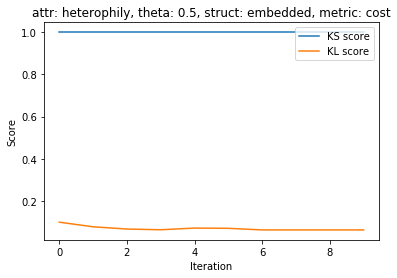

KS [1.0, 1.0, 1.0, 1.0, 0.875, 0.75, 0.4375, 0.375, 0.3125, 0.25]
KL [0.029978506017670725, 0.008005513216277904, 0.0049336999849035725, 0.002985454896367617, 0.0005443572844783962, 0.0003556009360103701, 0.00033290048952997007, 0.000290959496951901, 7.539298484160071e-05, 6.211965744689751e-05]


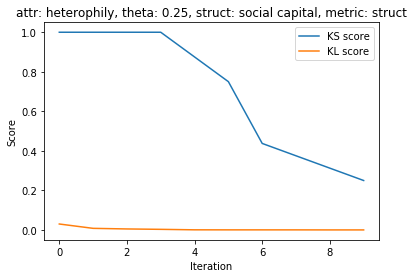

KS [0.875, 0.5625, 0.25, 0.375, 0.0625, 0.0625, 0.0, 0.0625, 0.0, 0.0]
KL [0.05625451940322272, 0.00891320357740739, 0.0035922809299744948, 0.002138940805376793, 0.00031541921501877226, 0.0009799230849497774, 0.0, 0.0005425164628319204, 0.0, 0.0004190030599952226]


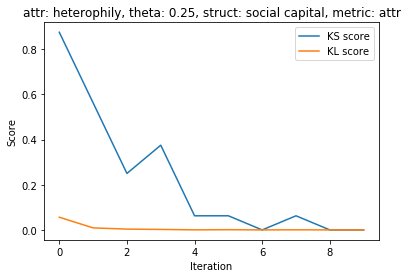

KS [1.0, 0.9375, 0.75, 0.625, 0.6875, 0.5625, 0.25, 0.125, 0.125, 0.3125]
KL [0.047050571487015594, 0.01515103512810889, 0.012962468116869214, 0.008334763522005196, 0.003698960939722717, 0.0025493833456819368, 0.0010676386142898318, 0.0014707886641746291, 0.0007118403907571428, 0.0010715142522605423]


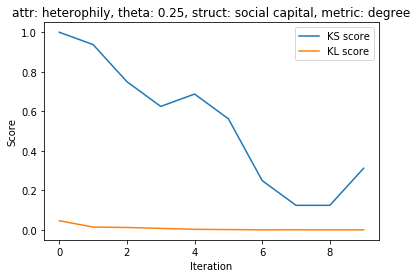

KS [1.0, 0.9375, 0.625, 0.625, 0.6875, 0.5625, 0.3125, 0.25, 0.125, 0.375]
KL [0.04806845422595505, 0.015983518169606827, 0.013558783220932444, 0.008087489176153382, 0.003978422267115699, 0.0029770559270598795, 0.0010121884490783334, 0.001419709146738047, 0.0007010372565655829, 0.0010570959873204304]


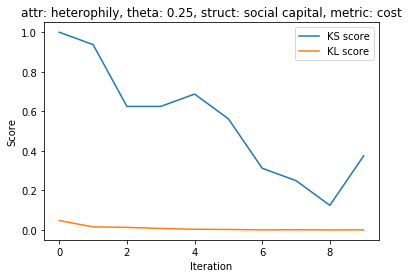

KS [0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [nan, inf, inf, inf, inf, inf, inf, inf, inf, inf]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2671: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)


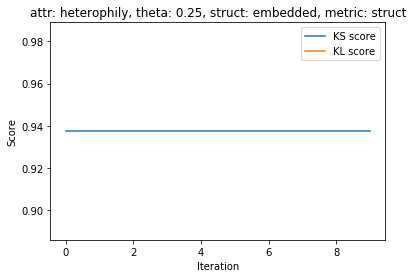

KS [0.9375, 0.9375, 0.9375, 0.875, 0.75, 0.75, 0.6875, 0.625, 0.625, 0.625]
KL [0.07807211741792054, 0.06679381522204172, 0.06324032829500378, 0.0725995129583301, 0.069526223070727, 0.069526223070727, 0.06873472619818537, 0.06774760160457179, 0.06774760160457179, 0.06774760160457179]


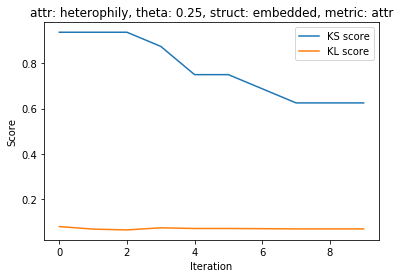

KS [0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [0.05137907709261384, 0.07532076438080289, 0.07041998353344088, 0.07852316014661095, 0.07503645099748069, 0.07503645099748069, 0.07266469428043629, 0.07361944410073748, 0.07361944410073748, 0.07361944410073748]


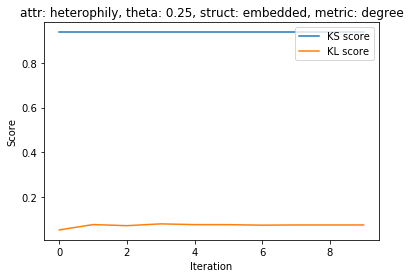

KS [0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
KL [0.05137630187404476, 0.07751966556690564, 0.07242245881637194, 0.08029238799497224, 0.0767511501411863, 0.0767511501411863, 0.07413939514368081, 0.07529477983206144, 0.07529477983206144, 0.07529477983206144]


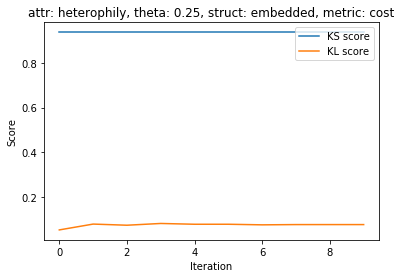

In [5]:
# Parameters
similarity_funcs = list(alu.gen_similarity_funcs())
attr_func_named = list(zip(similarity_funcs, ['homophily', 'heterophily']))
theta_values = [0.25, 0.5, 0.75, 1.0][::-1]
struct_funcs = [alu.ball2_size, alu.average_neighborhood_overlap]
struct_func_named = list(zip(struct_funcs, ['social capital', 'embedded']))
seed_types = ['grid', 'trivial']
num_runs = 10

for idx, (sim_func, af_name) in enumerate(attr_func_named):
    for theta in theta_values:
        attr_func = alu.gen_schelling_seg_funcs(theta, 'satisfice')[idx]
        for struct_func, sf_name in struct_func_named:
            for vtype in ['type0', 'type1']:
                params['vtx_types'][vtype]['struct_util'] = struct_func
                params['vtx_types'][vtype]['edge_attr_util'] = sim_func
                params['vtx_types'][vtype]['total_attr_util'] = attr_func
                
            # Run simulations
            struct_util_comp = {}
            attr_util_comp = {}
            degrees_comp = {}
            costs_comp = {}
            for seed in seed_types:
                struct_util_comp[seed] = defaultdict(list)
                attr_util_comp[seed] = defaultdict(list)
                degrees_comp[seed] = defaultdict(list)
                costs_comp[seed] = defaultdict(list)
                params['seed_type'] = seed
                for _ in range(num_runs):
                    G = attribute_network(_N, params)
                    for it in range(iter_count):
                        calc_edges(G)
                        struct_util_comp[seed][it].append(struct_utils(G))
                        attr_util_comp[seed][it].append(attribute_utils(G))
                        degrees_comp[seed][it].append(degrees(G))
                        costs_comp[seed][it].append(costs(G))
                def avg_dict(d):
                    it_avg = lambda d, it : np.mean(np.array(d[seed][it]), axis=0)
                    averaged = [ it_avg(d, it) for it in range(iter_count) ]
                    d.update({ seed : averaged })
                avg_dict(struct_util_comp)
                avg_dict(attr_util_comp)
                avg_dict(degrees_comp)
                avg_dict(costs_comp)
                    
            # Comparisons
            metric_name = ['struct', 'attr', 'degree', 'cost']
            metric_comps = zip(metric_name,
                               [struct_util_comp,
                                attr_util_comp,
                                degrees_comp,
                                costs_comp])
        
            for mname, mvalues in metric_comps:
                plot_title = f'attr: {af_name}, theta: {theta}, struct: {sf_name}, metric: {mname}'
                ks_values = [ ks_2samp(mvalues['grid'][it], mvalues['trivial'][it])[0] \
                             for it in range(iter_count) ]
                kl_values = [ entropy(mvalues['grid'][it], mvalues['trivial'][it]) \
                             for it in range(iter_count) ] # entropy does normalization internally
                print('KS', ks_values)
                print('KL', kl_values)
                plot_distributions(ks_values, kl_values, plot_title)